<h3 align=center> In His Name, the Most High </h3>

In [ ]:
#importing libraries
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn') # beautiful plots :O

## ATIS Dataset EDA

The ATIS dataset is a standard benchmark dataset widely used for intent classification and slot filling.
here we obtained the dataset from https://github.com/yvchen/JointSLU.

In [ ]:
def dataLoader(filename, drop_list = ['atis_cheapest']):
  words_list = list() # a list of list of words for every sentence in dataset
  tags_list = list() # a list of list of IOB tags for every sentence in dataset
  intents_list = list() # a list of intent for every sentence in dataset
  data = list() # a list of dicts contaiting above data in a more structured form
  vocabs = set() # a set containing whole dataset words

  with open(filename) as f:
    for line in f.readlines():
        line = line.strip().split()
        
        index = 0
        words = list()
        for i, word in enumerate(line[:-1]):
            if (word == 'EOS'):
                index = i
                break
            if (word != 'BOS'): 
                # what to do if not word.isalpha()??
                # word = re.sub(r'[^\w\s]', '', word) # removing punctuations
                word = re.sub("[?|'|!|.]","", word) # removing punctuations
                word = word.lower() # lowerizing word
                words.append(word) 
                vocabs.add(word)
        
        tags = list()
        for tag in line[index + 2:-1]:
            tags.append(tag)
                    
        # handling entries with multiple intents
        intent = ""
        if ('#' in line[-1]): 
            for item in line[-1].split('#'):
                intent = item
                break
        else: intent = line[-1]

        if (intent not in drop_list): #dropping 
          words_list.append(words)
          tags_list.append(tags)
          intents_list.append(intent)
          data.append({
              'words': words,
              'iob_tags': tags,
              #             'length': len(words),
              'intent': intent})

  return words_list, tags_list, intents_list, vocabs, data


def dataStatistics(tags_list, intents_list, vocabs):
  print('dataset vocab size:', len(vocabs))
  print('# of dataset rows:', len(intents_list))
  print('# of dataset unique intents:', len(set(intents_list)))
  print('# of dataset unique IOB tags:', len(set([tag for item in tags_list for tag in item])))

  print('-' * 35 + '\nintents distribution:') 
  intents_freq = dict()
  for intent in set(intents_list):
      intents_freq[intent] = intents_list.count(intent)
  for key in intents_freq:
      value = intents_freq[key]
      print('%s: %d (%.2f%%),' % (key, value, value / len(intents_list) * 100))
  print()
  plt.figure(figsize=(24, 8))
  plt.bar(list(intents_freq.keys()),intents_freq.values())
  plt.show()

  print('\n' + '-' * 35 + '\ntags distribution:')
  tags_freq = dict()
  count = 0
  for item in tags_list:
      for tag in item:
          if (tag in tags_freq): tags_freq[tag] += 1 
          else: tags_freq[tag] = 1
          count += 1
  for key in tags_freq:
      value = tags_freq[key]
      print('%s: %d (%.2f%%),' % (key, value, value / count * 100))
    
  return intents_freq, tags_freq

dataset vocab size: 895
# of dataset rows: 4977
# of dataset unique intents: 16
# of dataset unique IOB tags: 121
-----------------------------------
intents distribution:
atis_distance: 20 (0.40%),
atis_flight: 3687 (74.08%),
atis_restriction: 6 (0.12%),
atis_city: 19 (0.38%),
atis_airfare: 424 (8.52%),
atis_meal: 6 (0.12%),
atis_capacity: 16 (0.32%),
atis_abbreviation: 147 (2.95%),
atis_ground_fare: 18 (0.36%),
atis_flight_no: 12 (0.24%),
atis_aircraft: 82 (1.65%),
atis_ground_service: 256 (5.14%),
atis_flight_time: 54 (1.08%),
atis_airport: 20 (0.40%),
atis_airline: 159 (3.19%),
atis_quantity: 51 (1.02%),



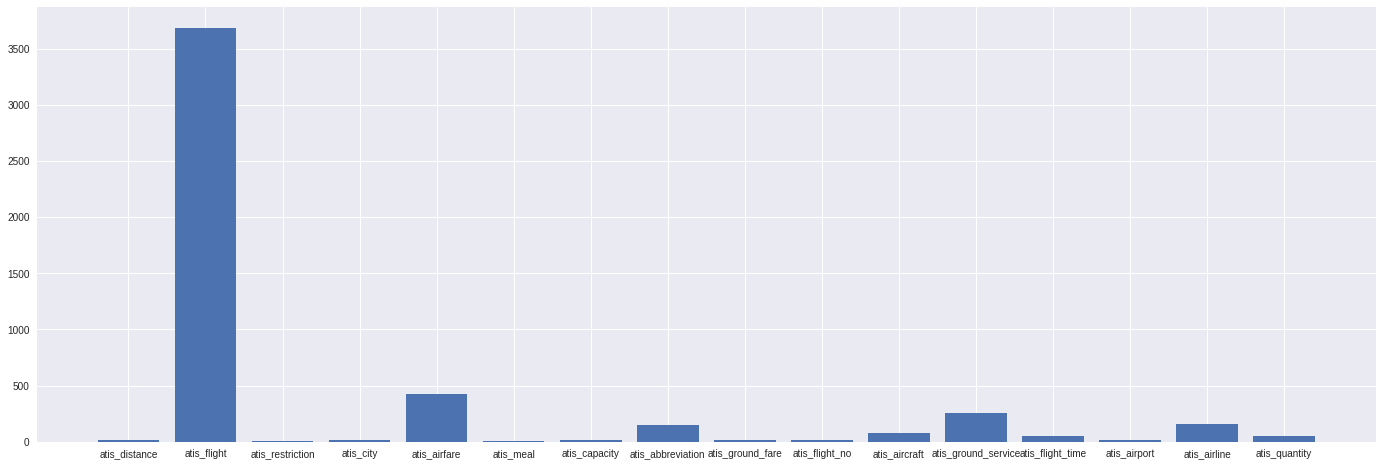


-----------------------------------
tags distribution:
O: 35662 (63.46%),
B-fromloc.city_name: 4326 (7.70%),
B-toloc.city_name: 4343 (7.73%),
B-round_trip: 348 (0.62%),
I-round_trip: 339 (0.60%),
B-cost_relative: 343 (0.61%),
B-fare_amount: 53 (0.09%),
I-fare_amount: 51 (0.09%),
B-arrive_date.month_name: 47 (0.08%),
B-arrive_date.day_number: 47 (0.08%),
I-fromloc.city_name: 691 (1.23%),
B-stoploc.city_name: 239 (0.43%),
B-arrive_time.time_relative: 187 (0.33%),
B-arrive_time.time: 208 (0.37%),
I-arrive_time.time: 161 (0.29%),
B-toloc.state_code: 86 (0.15%),
I-toloc.city_name: 1099 (1.96%),
I-stoploc.city_name: 47 (0.08%),
B-meal_description: 57 (0.10%),
B-depart_date.month_name: 379 (0.67%),
B-depart_date.day_number: 395 (0.70%),
B-airline_name: 701 (1.25%),
I-airline_name: 421 (0.75%),
B-depart_time.period_of_day: 593 (1.06%),
B-depart_date.day_name: 889 (1.58%),
B-toloc.state_name: 77 (0.14%),
B-depart_time.time_relative: 323 (0.57%),
B-depart_time.time: 369 (0.66%),
B-toloc.airport

In [ ]:
#importing train data
train_words, train_tags, train_intents, train_vocabs, train_data = dataLoader('atis-2.train+dev.w-intent.iob')
train_intents_freq, train_tags_freq = dataStatistics(train_tags, train_intents, train_vocabs)

In [ ]:
ind = 0
print('tokenized words:', train_data[ind]['words'])
print('IOB tags:', train_data[ind]['iob_tags'])
print('intent:', train_data[ind]['intent'])

tokenized words: ['i', 'want', 'to', 'fly', 'from', 'baltimore', 'to', 'dallas', 'round', 'trip']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'B-round_trip', 'I-round_trip']
intent: atis_flight


dataset vocab size: 448
# of dataset rows: 893
# of dataset unique intents: 16
# of dataset unique IOB tags: 101
-----------------------------------
intents distribution:
atis_distance: 10 (1.12%),
atis_flight: 645 (72.23%),
atis_city: 6 (0.67%),
atis_airfare: 49 (5.49%),
atis_meal: 6 (0.67%),
atis_capacity: 21 (2.35%),
atis_abbreviation: 33 (3.70%),
atis_flight_time: 1 (0.11%),
atis_ground_fare: 7 (0.78%),
atis_aircraft: 9 (1.01%),
atis_ground_service: 36 (4.03%),
atis_flight_no: 9 (1.01%),
atis_day_name: 2 (0.22%),
atis_airport: 18 (2.02%),
atis_airline: 38 (4.26%),
atis_quantity: 3 (0.34%),



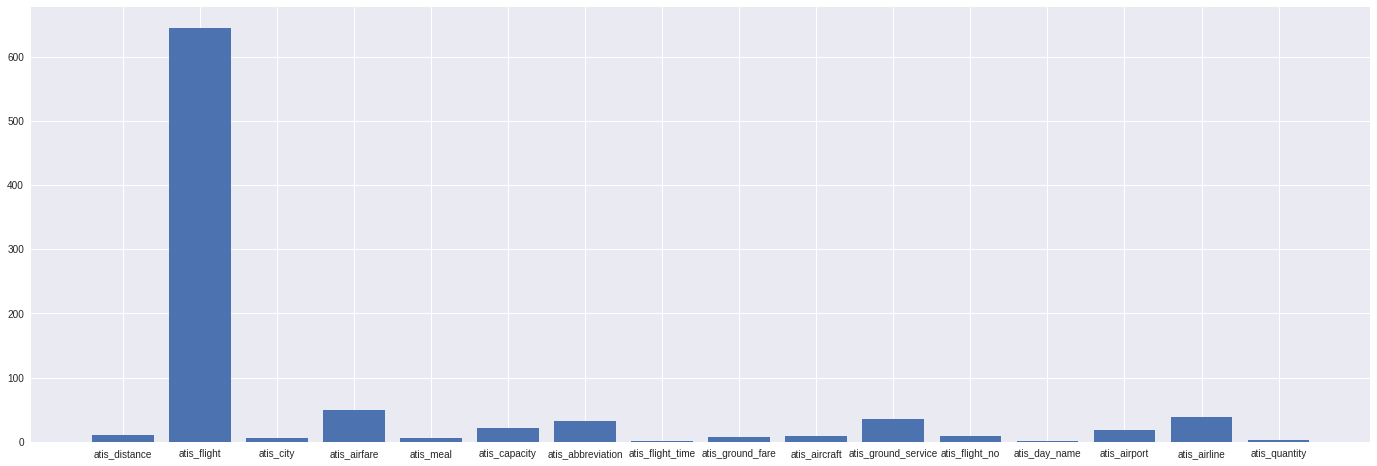


-----------------------------------
tags distribution:
O: 5501 (60.03%),
B-fromloc.city_name: 704 (7.68%),
B-toloc.city_name: 716 (7.81%),
I-toloc.city_name: 265 (2.89%),
B-stoploc.city_name: 20 (0.22%),
I-stoploc.city_name: 10 (0.11%),
B-depart_date.month_name: 56 (0.61%),
B-depart_date.day_number: 55 (0.60%),
B-depart_time.time_relative: 65 (0.71%),
B-depart_time.time: 57 (0.62%),
I-depart_time.time: 52 (0.57%),
B-round_trip: 73 (0.80%),
I-round_trip: 71 (0.77%),
B-airline_name: 101 (1.10%),
I-airline_name: 65 (0.71%),
B-depart_date.day_name: 212 (2.31%),
B-depart_time.period_of_day: 130 (1.42%),
I-fromloc.city_name: 177 (1.93%),
B-meal_description: 10 (0.11%),
B-depart_date.date_relative: 17 (0.19%),
B-arrive_time.time_relative: 31 (0.34%),
B-arrive_time.time: 34 (0.37%),
I-arrive_time.time: 35 (0.38%),
B-return_date.day_name: 2 (0.02%),
B-arrive_date.date_relative: 2 (0.02%),
B-arrive_date.day_name: 11 (0.12%),
B-flight_stop: 21 (0.23%),
B-depart_date.today_relative: 9 (0.10%),
B-

In [ ]:
#importing test data
test_words, test_tags, test_intents, test_vocabs, test_data = dataLoader('atis.test.w-intent.iob')
test_intents_freq, test_tags_freq = dataStatistics(test_tags, test_intents, test_vocabs)

In [ ]:
ind = 0
print('tokenized words:', test_data[ind]['words'])
print('IOB tags:', test_data[ind]['iob_tags'])
print('intent:', test_data[ind]['intent'])

tokenized words: ['i', 'would', 'like', 'to', 'find', 'a', 'flight', 'from', 'charlotte', 'to', 'las', 'vegas', 'that', 'makes', 'a', 'stop', 'in', 'st', 'louis']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'I-toloc.city_name', 'O', 'O', 'O', 'O', 'O', 'B-stoploc.city_name', 'I-stoploc.city_name']
intent: atis_flight


##### comparing train & test dataset tags & intents:

In [ ]:
print(test_vocabs.difference(train_vocabs))

{'468', 'lga', 'cvg', '811', '486', '608', 'be1', 'wn', '1800', '20', 'yx', 'basis', '1994', 'called', 'mci', '665', 'kw', 'dtw', '320', 'miles', 'l10', 'comes', 'dh8', 'not', '419', 'tpa', '950', 'included', '382', 'exceeding', 'snacks', 'dc9', '842', 'good', 'sam', 'india', '1201', 'ap58', 'bn', 'combination', 'dca', 'prior', 'al', '639', 'sb', 'kennedy', '1207', '673', 'l1011', 'ever', 'bh', 'phl'}


In [ ]:
set(test_intents).difference(set(train_intents))

{'atis_day_name'}

so from above, we see there is no train data for 'atis_day_name'...

In [ ]:
set(train_intents).difference(set(test_intents))

{'atis_restriction'}

and also there are no test data for 'atis_cheapest' & 'atis_restriction'...

In [ ]:
set(test_tags_freq.keys()).difference(set(train_tags_freq.keys()))

{'B-booking_class',
 'B-compartment',
 'B-flight',
 'B-stoploc.airport_code',
 'I-flight_number',
 'I-state_name'}

also we see there are no train data with 'B-stoploc.airport_code' or 'B-booking_class' or 'I-flight_number' or 'I-state_name' or 'B-flight' or 'B-compartment' tag...

In [ ]:
set(train_tags_freq.keys()).difference(set(test_tags_freq.keys()))

{'B-arrive_date.today_relative',
 'B-arrive_time.period_mod',
 'B-day_number',
 'B-month_name',
 'B-return_date.day_number',
 'B-return_date.month_name',
 'B-return_date.today_relative',
 'B-return_time.period_mod',
 'B-return_time.period_of_day',
 'B-stoploc.airport_name',
 'B-stoploc.state_code',
 'B-time',
 'B-time_relative',
 'B-today_relative',
 'I-arrive_date.day_number',
 'I-arrive_time.period_of_day',
 'I-depart_date.today_relative',
 'I-economy',
 'I-fare_basis_code',
 'I-flight_stop',
 'I-meal_code',
 'I-meal_description',
 'I-return_date.day_number',
 'I-return_date.today_relative',
 'I-time',
 'I-today_relative'}

and finally there are no train data with 'I-return_date.day_number' or 'B-return_time.period_mod' or ... tag.

# Handling Imbalanced dataset

to handle imbalanced data first we try to find and remove duplicates:

In [ ]:
def removeDuplicate(words_list, tags_list, intents_list):
  words_dup_free = list()
  tags_dup_free = list()
  intents_dup_free = list()
  data_dup_free = list()
  for i in range(len(words_list)):
    words = words_list[i]
    tags = tags_list[i]
    intent = intents_list[i]
    # if (intent != 'atis_flight' or (intent == 'atis_flight' and words not in words_dup_free)):
    if (words not in words_dup_free):
        words_dup_free.append(words)
        tags_dup_free.append(tags)
        intents_dup_free.append(intent)
        data_dup_free.append({
            'words': words,
            'iob_tags': tags,
            #             'length': len(words),
            'intent': intent})
  print('# of duplicate sentences in train data: %d - %d = %d' % (len(words_list), len(words_dup_free), len(words_list) - len(words_dup_free)))

  return words_dup_free, tags_dup_free, intents_dup_free, data_dup_free

In [ ]:
#removing duplicate train data  #with 'atis_flight' intent
train_words_dup_free, train_tags_dup_free, train_intents_dup_free, train_data_dup_free = removeDuplicate(train_words, train_tags, train_intents)

# of duplicate sentences in train data: 4977 - 4633 = 344


dataset vocab size: 895
# of dataset rows: 4633
# of dataset unique intents: 16
# of dataset unique IOB tags: 121
-----------------------------------
intents distribution:
atis_distance: 20 (0.43%),
atis_flight: 3443 (74.31%),
atis_restriction: 5 (0.11%),
atis_city: 18 (0.39%),
atis_airfare: 404 (8.72%),
atis_meal: 6 (0.13%),
atis_capacity: 16 (0.35%),
atis_abbreviation: 108 (2.33%),
atis_ground_fare: 17 (0.37%),
atis_flight_no: 12 (0.26%),
atis_aircraft: 79 (1.71%),
atis_ground_service: 236 (5.09%),
atis_flight_time: 52 (1.12%),
atis_airport: 18 (0.39%),
atis_airline: 150 (3.24%),
atis_quantity: 49 (1.06%),



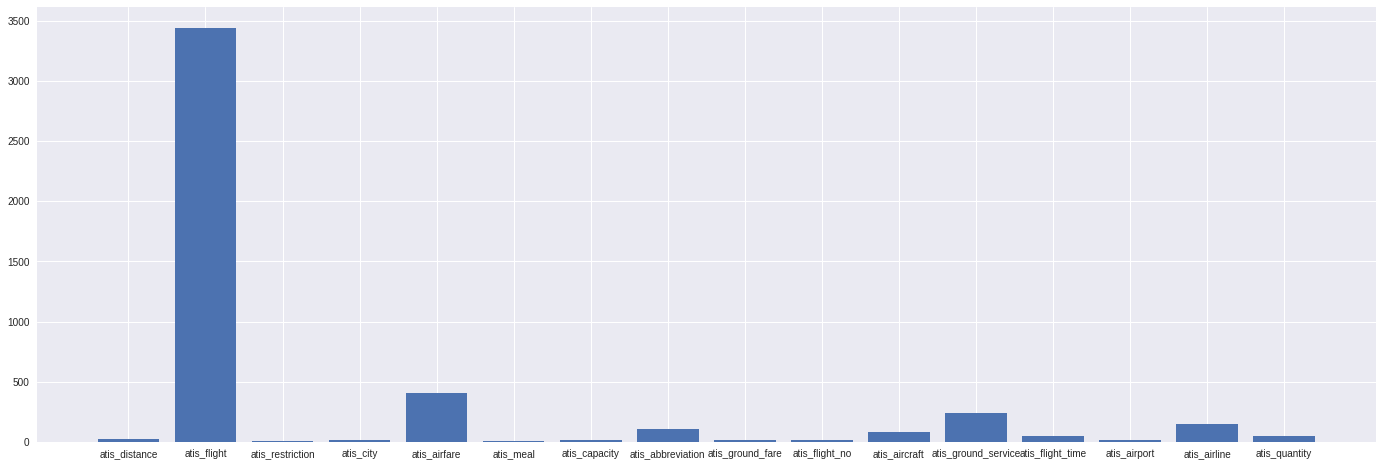


-----------------------------------
tags distribution:
O: 33807 (63.44%),
B-fromloc.city_name: 4066 (7.63%),
B-toloc.city_name: 4080 (7.66%),
B-round_trip: 318 (0.60%),
I-round_trip: 310 (0.58%),
B-cost_relative: 320 (0.60%),
B-fare_amount: 41 (0.08%),
I-fare_amount: 39 (0.07%),
B-arrive_date.month_name: 46 (0.09%),
B-arrive_date.day_number: 46 (0.09%),
I-fromloc.city_name: 655 (1.23%),
B-stoploc.city_name: 233 (0.44%),
B-arrive_time.time_relative: 180 (0.34%),
B-arrive_time.time: 200 (0.38%),
I-arrive_time.time: 156 (0.29%),
B-toloc.state_code: 82 (0.15%),
I-toloc.city_name: 1059 (1.99%),
I-stoploc.city_name: 45 (0.08%),
B-meal_description: 55 (0.10%),
B-depart_date.month_name: 369 (0.69%),
B-depart_date.day_number: 385 (0.72%),
B-airline_name: 684 (1.28%),
I-airline_name: 413 (0.78%),
B-depart_time.period_of_day: 582 (1.09%),
B-depart_date.day_name: 866 (1.63%),
B-toloc.state_name: 75 (0.14%),
B-depart_time.time_relative: 310 (0.58%),
B-depart_time.time: 356 (0.67%),
B-toloc.airport

In [ ]:
train_intents_dup_free_freq, train_tags_dup_free_freq = dataStatistics(train_tags_dup_free, train_intents_dup_free, train_vocabs)

In [ ]:
##removing duplicate test data with #'atis_flight' intent
test_words_dup_free, test_tags_dup_free, test_intents_dup_free, test_data_dup_free = removeDuplicate(test_words, test_tags, test_intents)

# of duplicate sentences in train data: 893 - 850 = 43


dataset vocab size: 448
# of dataset rows: 850
# of dataset unique intents: 16
# of dataset unique IOB tags: 101
-----------------------------------
intents distribution:
atis_distance: 10 (1.18%),
atis_flight: 626 (73.65%),
atis_city: 5 (0.59%),
atis_airfare: 49 (5.76%),
atis_meal: 6 (0.71%),
atis_capacity: 21 (2.47%),
atis_abbreviation: 26 (3.06%),
atis_flight_time: 1 (0.12%),
atis_ground_fare: 7 (0.82%),
atis_aircraft: 8 (0.94%),
atis_ground_service: 36 (4.24%),
atis_flight_no: 9 (1.06%),
atis_day_name: 2 (0.24%),
atis_airport: 13 (1.53%),
atis_airline: 28 (3.29%),
atis_quantity: 3 (0.35%),



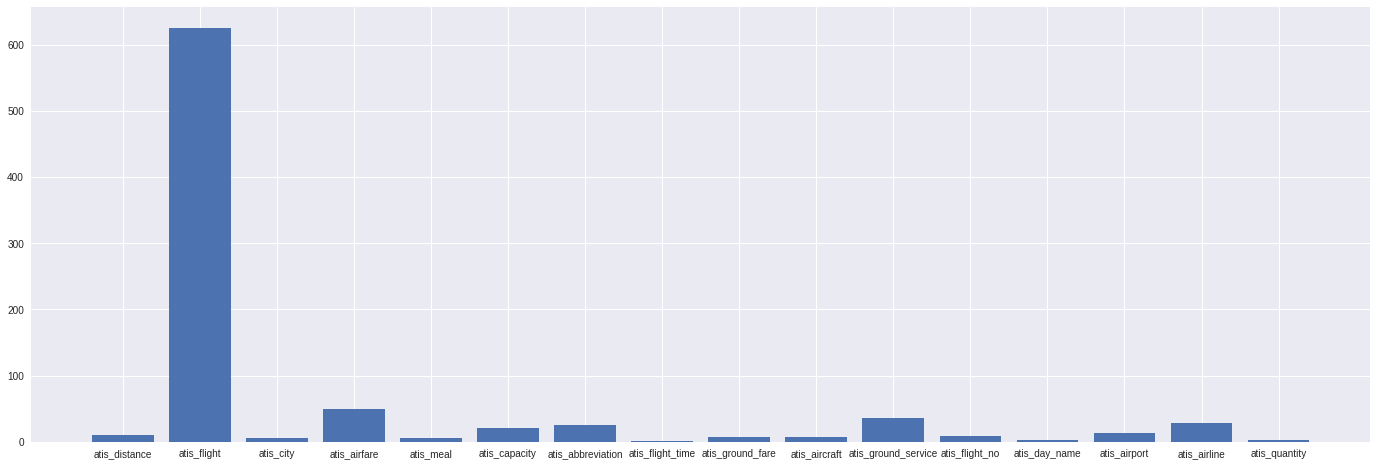


-----------------------------------
tags distribution:
O: 5325 (59.93%),
B-fromloc.city_name: 685 (7.71%),
B-toloc.city_name: 696 (7.83%),
I-toloc.city_name: 258 (2.90%),
B-stoploc.city_name: 20 (0.23%),
I-stoploc.city_name: 10 (0.11%),
B-depart_date.month_name: 56 (0.63%),
B-depart_date.day_number: 55 (0.62%),
B-depart_time.time_relative: 64 (0.72%),
B-depart_time.time: 56 (0.63%),
I-depart_time.time: 51 (0.57%),
B-round_trip: 71 (0.80%),
I-round_trip: 69 (0.78%),
B-airline_name: 101 (1.14%),
I-airline_name: 65 (0.73%),
B-depart_date.day_name: 209 (2.35%),
B-depart_time.period_of_day: 129 (1.45%),
I-fromloc.city_name: 169 (1.90%),
B-meal_description: 10 (0.11%),
B-depart_date.date_relative: 17 (0.19%),
B-arrive_time.time_relative: 31 (0.35%),
B-arrive_time.time: 34 (0.38%),
I-arrive_time.time: 35 (0.39%),
B-return_date.day_name: 2 (0.02%),
B-arrive_date.date_relative: 2 (0.02%),
B-arrive_date.day_name: 11 (0.12%),
B-flight_stop: 21 (0.24%),
B-depart_date.today_relative: 9 (0.10%),
B-

In [ ]:
test_intents_dup_free_freq, test_tags_dup_free_freq = dataStatistics(test_tags_dup_free, test_intents_dup_free, test_vocabs)

so we can see that unfortunately removing duplicates didn't have any noticable improvment on balancing the dataset.

## Classes weights

In [ ]:
from sklearn.utils import class_weight
class_weight.compute_class_weight('balanced',np.unique(train_intents_dup_free) ,train_intents_dup_free)

array([ 2.68113426,  3.6653481 ,  0.71673886,  1.93041667, 16.08680556,
       18.09765625, 16.08680556, 14.478125  ,  0.0841018 , 24.13020833,
        5.56850962, 17.03308824,  1.22695975, 48.26041667,  5.90943878,
       57.9125    ])

##Sentence generation by synonym replacement

In [ ]:
def create_iob_file(filename, data):
  f = open(filename, 'w')
  for i in range(len(data)):
    sentence = " ".join(data[i]['words'])
    tags = " ".join(data[i]['iob_tags'])
    intent = data[i]['intent']
    f.write("BOS %s EOS\t%s %s\n" % (sentence, tags, intent))
  f.close()

In [ ]:
%%capture
!pip install numpy requests nlpaug transformers

In [ ]:
# %%capture
import nlpaug.augmenter.word as naw
import nlpaug.model.word_stats as nmw
from nlpaug.util.file.download import DownloadUtil
import nltk
# import gensim.downloader as api
import pickle
import time  

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('stopwords')
nltk.download('wordnet')

# glove = api.load('glove-twitter-25') 
DownloadUtil.download_glove(model_name='glove.6B', dest_dir='.') # Download GloVe model

# Train TF-IDF model
# tfidf_model = nmw.TfIdf()
# tfidf_model.train(train_words)
# tfidf_model.save('.')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
stop = nltk.corpus.stopwords.words('english')

In [ ]:
aug_p=0.25
aug_max=5
aug_min=1
syn = naw.SynonymAug(aug_src='wordnet', stopwords=stop, aug_p=aug_p, aug_max=aug_max, aug_min=aug_min)
context = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', stopwords=stop, aug_p=aug_p, aug_max=aug_max, aug_min=aug_min, action="substitute")
emb = naw.WordEmbsAug(model_type='glove', model_path='glove.6B.300d.txt', stopwords=stop, aug_p=aug_p, aug_max=aug_max, aug_min=aug_min, action="substitute")
# tfidf = naw.TfIdfAug(model_path='.',stopwords=stop, aug_p=aug_p, aug_max=aug_max, aug_min=aug_min,action="substitute")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
f = open('train_data_generated3.pkl','rb')
new_dict = pickle.load(f)
f.close()
len(new_dict)

61

In [ ]:
# train_data_generated = new_dict

In [33]:
# train_data_generated = list
starting_index = 413
i = starting_index
while (i < len(train_data_dup_free)):
# for i in range(starting_index, len(train_data_dup_free)):
  # if (train_data_dup_free[i]['intent'] != 'atis_flight'):
  if (train_data_dup_free[i]['intent'] in ['atis_restriction', 'atis_meal', 'atis_capacity', 'atis_ground_fare', 'atis_flight_no', 'atis_airport']):

    orig_sentence = " ".join(train_data_dup_free[i]['words'])
    orig_tags = train_data_dup_free[i]['iob_tags']
    orig_intent = train_data_dup_free[i]['intent']
    print('\nindex = %d, intent: %s\noriginal sentence: %s\n' % (i, orig_intent, orig_sentence))

    generated = list()
    generated += context.augment(orig_sentence, n = 5)
    generated += emb.augment(orig_sentence, n = 5)
    generated += syn.augment(orig_sentence, n = 5)
    for j in range(len(generated)):
      if (j % 5 == 0): print()
      print('#%d: %s' % (j, generated[j]))
    new_sentence = ''
    while(True):
      inp = input('\nenter value between 0-'+ str(len(generated) - 1) +' or n to enter new sentence manually, r to regenerate sentences, s to skip sentence or b to break : ')
      if (inp.isalpha()):
        if (inp.lower() == 'n'): new_sentence = input('enter new sentence: ')
        elif (inp.lower() == 'r'):
          generated = list()
          generated += context.augment(orig_sentence, n = 5)
          generated += emb.augment(orig_sentence, n = 5)
          generated += syn.augment(orig_sentence, n = 5)
          print('\nindex=%d, intent:%s\noriginal sentence: %s\n' % (i, orig_intent, orig_sentence))
          for j in range(len(generated)):
            if (j % 5 == 0): print()
            print('#%d: %s' % (j, generated[j]))
          continue

        elif (inp.lower() == 'b'):
          print('_' * 80)
          print('\nlast index = %d\nbreaking...' % (i))
          i = len(train_data_dup_free)
          # pickle.dump(train_data_generated, f)
          break
        
        elif (inp.lower() == 's'): break

        else: continue

      elif (inp.isnumeric()):
        inp = int(inp)
        if(inp > len(generated) - 1): continue
        new_sentence = generated[inp]

      else: continue

      ans = input('\noriginal sentence: %s\nnew sentence: %s\nis it ok? (y or n) ' %(orig_sentence, new_sentence))
      if (ans.lower() == 'y' or ans.lower() == 'yes'): break
    
    if (new_sentence != ''):
      new_words = new_sentence.strip().split()
      train_data_generated.append({
              'words': new_words,
              'iob_tags': orig_tags,
  #             'length': len(new_words),
              'intent': orig_intent})     
    
    # pickle.dump(train_data_generated, f)
    print('_' * 80)
    print('# of generated sentences: %d\n' %(len(train_data_generated)))
  i += 1


f = open('train_data_generated.pkl','wb')
pickle.dump(train_data_generated, f)
f.close()


index = 404, intent: atis_quantity
original sentence: how many cities are served by continental with first class flights


#0: how many cities are used by hotels with first class flights
#1: how many cities are served by 747 with first international flights
#2: how certain establishments are served by continental with first class flights
#3: how. cities are served by continental with jet class flights
#4: how many cities are visited by continental with first class ×

#5: how many cities are served by continental with first diesel haneda
#6: how many cities are served by airways with year class flights
#7: how many cities are deputy by continental with was class flights
#8: how many cities are served by divisions with first model flights
#9: how many cities are served by continental with years standard flights

#10: how many city are served by continental with foremost class flights
#11: how many cities are serve by continental with first class flights
#12: how many cities are served b

In [ ]:
# f = open('train_data_generated.pkl','wb')
# pickle.dump(train_data_generated, f)
# f.close()

In [76]:
f = open('train_data_generated.pkl','rb')
new_dict = pickle.load(f)
f.close()
len(new_dict)

92

In [77]:
# train_data_generated = new_dict

adding some random misspellings

In [67]:
create_iob_file('atis-generated-w-intent.iob', train_data_generated)

In [69]:
spell = naw.SpellingAug(dict_path ='spelling_en.txt', aug_p=aug_p, aug_max=aug_max, aug_min=aug_min)

In [ ]:
# f = open('train_data_misspell.pkl','rb')
# dict_temp = pickle.load(f)
# f.close()
# len(dict_temp)

In [ ]:
# train_data_misspell = dict_temp

In [88]:
# train_data_misspell = list()
starting_index = 1290
i = starting_index
while (i < len(train_data_dup_free)):
  # if (train_data_dup_free[i]['intent'] != 'atis_flight'):
  # if (train_data_dup_free[i]['intent'] in ['atis_distance', 'atis_restriction', 'atis_city', 'atis_meal', 'atis_capacity', 'atis_ground_fare', 'atis_flight_no', 'atis_flight_time', 'atis_airport', 'atis_quantity']):
  if (train_data_dup_free[i]['intent'] in ['atis_restriction', 'atis_meal', 'atis_capacity', 'atis_ground_fare', 'atis_flight_no', 'atis_airport']):
    orig_sentence = " ".join(train_data_dup_free[i]['words'])
    orig_tags = train_data_dup_free[i]['iob_tags']
    orig_intent = train_data_dup_free[i]['intent']
    print('\nindex = %d, intent: %s\noriginal sentence: %s\n' % (i, orig_intent, orig_sentence))

    generated = spell.augment(orig_sentence, n = 15)
    for j in range(len(generated)):
      print('#%d: %s' % (j, generated[j]))
    new_sentence = ''
    while(True):
      inp = input('\nenter value between 0-'+ str(len(generated) - 1) +' or n to enter new sentence manually, r to regenerate sentences, s to skip sentence or b to break : ')
      if (inp.isalpha()):
        if (inp.lower() == 'n'): new_sentence = input('enter new sentence: ')
        elif (inp.lower() == 'r'):
          generated = spell.augment(orig_sentence, n = 15)
          print('\nindex=%d, intent:%s\noriginal sentence: %s\n' % (i, orig_intent, orig_sentence))
          for j in range(len(generated)):
            print('#%d: %s' % (j, generated[j]))
          continue

        elif (inp.lower() == 'b'):
          print('_' * 80)
          print('\nlast index = %d\nbreaking...' % (i))
          i = len(train_data_dup_free)
          break
        
        elif (inp.lower() == 's'): break

        else: continue

      elif (inp.isnumeric()):
        inp = int(inp)
        if(inp > len(generated) - 1): continue
        new_sentence = generated[inp]

      else: continue

      ans = input('\noriginal sentence: %s\nnew sentence: %s\nis it ok? (y or n) ' %(orig_sentence, new_sentence))
      if (ans.lower() == 'y' or ans.lower() == 'yes'): break
    
    if (new_sentence != ''):
      new_words = new_sentence.strip().split()
      train_data_misspell.append({
              'words': new_words,
              'iob_tags': orig_tags,
  #             'length': len(new_words),
              'intent': orig_intent})     
    
    print('_' * 80)
    print('# of generated sentences: %d\n' %(len(train_data_misspell)))

  i += 1

f = open('train_data_misspell.pkl','wb')
pickle.dump(train_data_misspell, f)
f.close()


index = 998, intent: atis_airport
original sentence: show me airports near washington dc

#0: show me airports neare washington dc
#1: show My airports near washington dc
#2: show m airports near washington dc
#3: show me aeroports near washington dc
#4: show me airports neare washington dc
#5: show me airports near's washington dc
#6: show mi airports near washington dc
#7: schow me airports near washington dc
#8: schow me airports near washington dc
#9: showe me airports near washington dc
#10: schow me airports near washington dc
#11: showe me airports near washington dc
#12: show My airports near washington dc
#13: show meet airports near washington dc
#14: show me aerports near washington dc

enter value between 0-14 or n to enter new sentence manually, r to regenerate sentences, s to skip sentence or b to break : 2

original sentence: show me airports near washington dc
new sentence: show m airports near washington dc
is it ok? (y or n) u

enter value between 0-14 or n to enter 

In [ ]:
# f = open('train_data_misspell.pkl','wb')
# pickle.dump(train_data_misspell, f)
# f.close()

In [ ]:
create_iob_file('atis-misspell-w-intent.iob', train_data_misspell)

## SMOTE & ADASYN

In [38]:
# BoW and Tfidf vectorization

# # from keras.preprocessing.text import Tokenizer
# # from keras.preprocessing.sequence import pad_sequences
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# import numpy as np

# def identity_tokenizer(text):
#     return text
# # define Tokenizer with Vocab Size
# # tokenizer = Tokenizer(num_words=len(train_vocabs))
# # tokenizer.fit_on_texts(train_words)
# vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)
# x_train = vectorizer.fit_transform(train_words)
# x_test = vectorizer.fit_transform(test_words)
# # x_train = tokenizer.texts_to_matrix(train_words, mode='tfidf')
# # x_test = tokenizer.texts_to_matrix(test_words, mode='tfidf')

# encoder = LabelBinarizer()
# encoder.fit(train_intents)
# y_train = encoder.transform(train_intents)
# y_test = encoder.transform(test_intents)
# print(encoder.classes_)
# print(x_train.shape, y_train.shape)


In [39]:
# from imblearn.over_sampling import SMOTE, ADASYN
# desired_count = 500
# strategy = {0: desired_count, 15: desired_count}# setting atis_restriction and atis_abbreviation classes count just as an example
# smote = ADASYN(sampling_strategy=strategy, n_neighbors=5) #SMOTE(sampling_strategy='minority', k_neighbors=5)
# X_sm, y_sm = smote.fit_resample(x_train, y_train)
# print(X_sm.shape, y_sm.shape)

# y_ADASYN = list(encoder.inverse_transform(y_sm))
# ADASYN_freq = dict()
# for intent in y_ADASYN:
#     ADASYN_freq[intent] = y_ADASYN.count(intent)

# for key in ADASYN_freq:
#     value = ADASYN_freq[key]
#     print('%s: %d (%.2f%%),' % (key, value, value / len(y_ADASYN) * 100))

##Dropping similar sentences

In [40]:
# train sentences with 'atis_flight' intent
train_sentences_dup_free = list()
for i in range(len(train_intents_dup_free)):
  if (train_intents_dup_free[i] == 'atis_flight'): 
    item = " ".join(train_words_dup_free[i]) #stop words?
    train_sentences_dup_free.append(item)

len(train_sentences_dup_free)

3443

In [41]:
%%capture
!pip install -U sentence-transformers

In [42]:
%%capture
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
import math


In [43]:
corpus_sentences = train_sentences_dup_free
embedder = SentenceTransformer('stsb-mpnet-base-v2') #'paraphrase-mpnet-base-v2'

Downloading:   0%|          | 0.00/868 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.67k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/588 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [44]:
# finding similar pairs

#Compute embeddings
corpus_embeddings = embedder.encode(corpus_sentences,show_progress_bar=True, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.pytorch_cos_sim(corpus_embeddings, corpus_embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in pairs[0:10]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(corpus_sentences[i], corpus_sentences[j], pair['score']))

Batches:   0%|          | 0/108 [00:00<?, ?it/s]

please give me flights from atlanta to boston on wednesday morning and thursday afternoon 		 please give me flights from atlanta to boston on wednesday afternoon and thursday morning 		 Score: 0.9979
is there a flight between san francisco and boston with a stopover in dallas fort worth 		 is there a flight between san francisco and boston with a stopover at dallas fort worth 		 Score: 0.9974
what northwest airline flights leave denver before noon 		 what northwest airlines flights leave denver before noon 		 Score: 0.9963
whats the cheapest flight from denver to pittsburgh 		 what is the cheapest flight from denver to pittsburgh 		 Score: 0.9959
show me the list of flights from philadelphia to denver that leave in the afternoon 		 show me the list of flights between philadelphia and denver that leave in the afternoon 		 Score: 0.9959
list all flights from boston to atlanta after 6 oclock pm on wednesday 		 list all flights going from boston to atlanta after 6 oclock pm on wednesday 		

In [45]:
f = open('similar-pairs.txt', 'w')
for pair in pairs:
  i, j = pair['index']
  f.write("{} \t\t {} \t\t Score: {:.4f}\n".format(corpus_sentences[i], corpus_sentences[j], pair['score']))
  #print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], pair['score']))
  if (pair['score'] < 0.8): break
f.close()

In [46]:
# Corpus with example sentences
corpus_sentences = train_sentences_dup_free
corpus_embeddings = embedder.encode(corpus_sentences, show_progress_bar=True)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

Batches:   0%|          | 0/108 [00:00<?, ?it/s]

In [47]:
# # K-means

# num_clusters = 2000
# clustering_model = KMeans(n_clusters=num_clusters)
# clustering_model.fit(corpus_embeddings)
# cluster_assignment = clustering_model.labels_

# clustered_sentences = [[] for i in range(num_clusters)]
# for sentence_id, cluster_id in enumerate(cluster_assignment):
#     clustered_sentences[cluster_id].append(corpus_sentences[sentence_id])

In [48]:
# reduced_data = PCA(n_components=2).fit_transform(corpus_embeddings)
# kmeans = KMeans(n_clusters=num_clusters)
# kmeans.fit(reduced_data)

# # Step size of the mesh. Decrease to increase the quality of the VQ.
# h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# # Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
# y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Obtain labels for each point in mesh. Use last trained model.
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(figsize=(24, 12))
# plt.clf()
# plt.imshow(Z, interpolation="nearest",
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.Paired, aspect="auto", origin="lower")

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# # Plot the centroids as a white X
# # centroids = kmeans.cluster_centers_
# # plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
# #             color="w", zorder=10)
# plt.title("K-means clustering (PCA-reduced data)")
#           # "Centroids are marked with white cross")
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
# plt.show()

In [49]:
# # To get a better understanding of interaction of the dimensions
# # plot the first three PCA dimensions

# fig = plt.figure(1, figsize=(16, 12))
# ax = Axes3D(fig, elev=-150, azim=110)
# X_reduced = PCA(n_components=3).fit_transform(corpus_embeddings)
# ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],c=kmeans.labels_,
#            cmap=plt.cm.Set1, edgecolor='k', s=40)
# ax.set_title("First three PCA directions - Kmeans")
# ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])
# ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

# plt.show()

In [50]:
# pca = PCA(n_components=2)
# X_r = pca.fit(corpus_embeddings).transform(corpus_embeddings)


# # Percentage of variance explained for each components
# # print('explained variance ratio (first two components): %s'
# #       % str(pca.explained_variance_ratio_))

# plt.figure(1, figsize=(16, 12))

# for i, target_name in zip([x for x in range(len(kmeans.labels_))], set(kmeans.labels_)):
#     plt.scatter(X_r[kmeans.labels_ == i, 0], X_r[ kmeans.labels_ == i, 1], alpha=.8, label=target_name)
# # plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('PCA K-means')

# plt.show()

In [51]:
# f = open('Clusters-k-means.txt', 'w')
# for i, cluster in enumerate(clustered_sentences):
#     f.write("Cluster %d, #%d Elements :\n" % (i+1, len(cluster)) + str(cluster) + "\n\n\n")
#     # print("Cluster ", i+1)
#     # print(cluster)
#     # print("")
# f.close()

## Agglomerative Clustering


In [52]:
# clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1) 
clustering_model = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='average', distance_threshold=0.15)
model = clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences: clustered_sentences[cluster_id] = list()
    clustered_sentences[cluster_id].append(corpus_sentences[sentence_id])

len(clustered_sentences)

2108

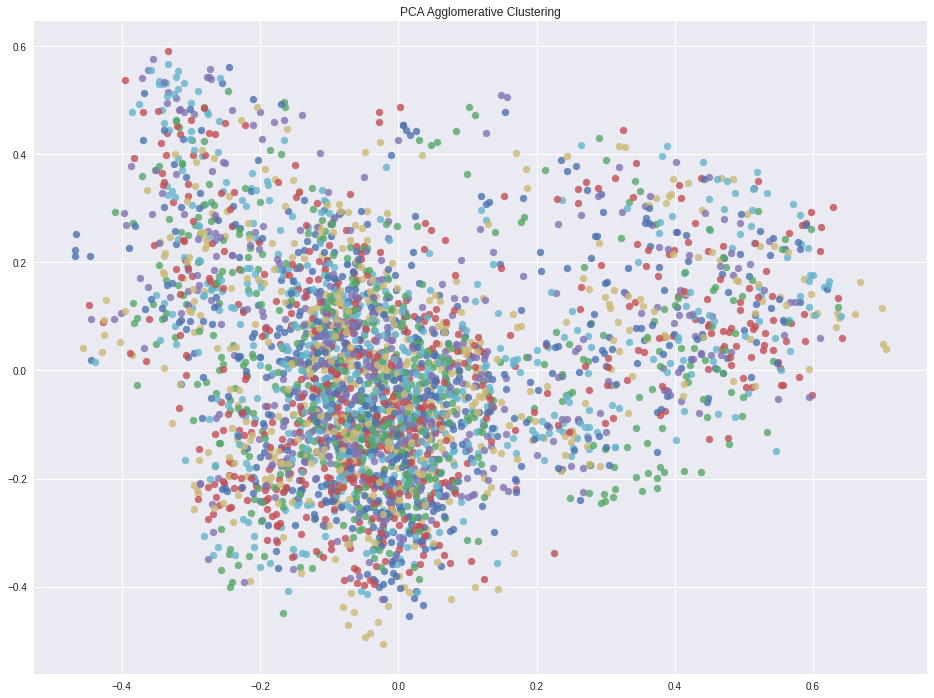

In [53]:
pca = PCA(n_components=2)
X_r = pca.fit(corpus_embeddings).transform(corpus_embeddings)

# Percentage of variance explained for each components
# print('explained variance ratio (first two components): %s'
#       % str(pca.explained_variance_ratio_))

plt.figure(1, figsize=(16, 12))

for i, target_name in zip([x for x in range(len(clustering_model.labels_))], set(clustering_model.labels_)):
    plt.scatter(X_r[clustering_model.labels_ == i, 0], X_r[ clustering_model.labels_ == i, 1], alpha=.8, label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA Agglomerative Clustering')

plt.show()

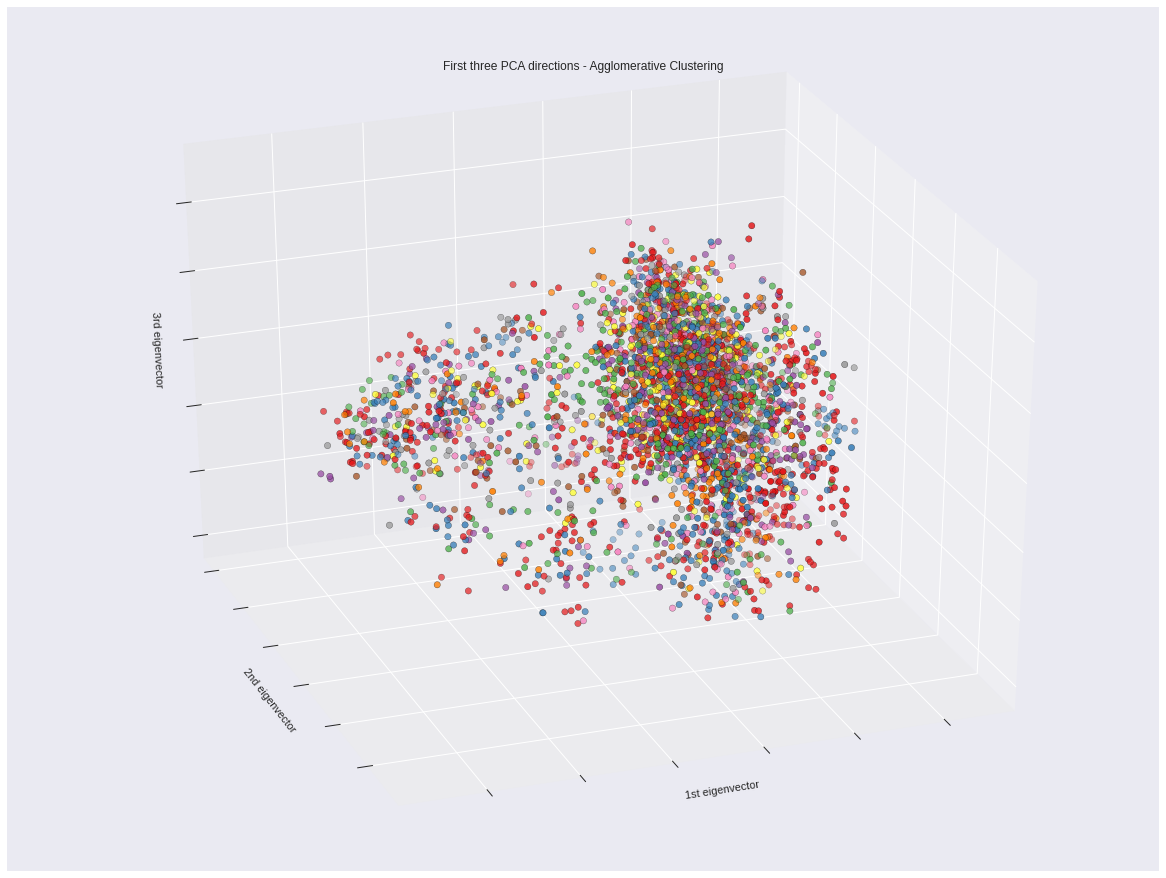

In [54]:
# To get a better understanding of interaction of the dimensions
# plot the first three PCA dimensions

fig = plt.figure(1, figsize=(16, 12))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(corpus_embeddings)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],c=clustering_model.labels_,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions - Agglomerative Clustering")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [55]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

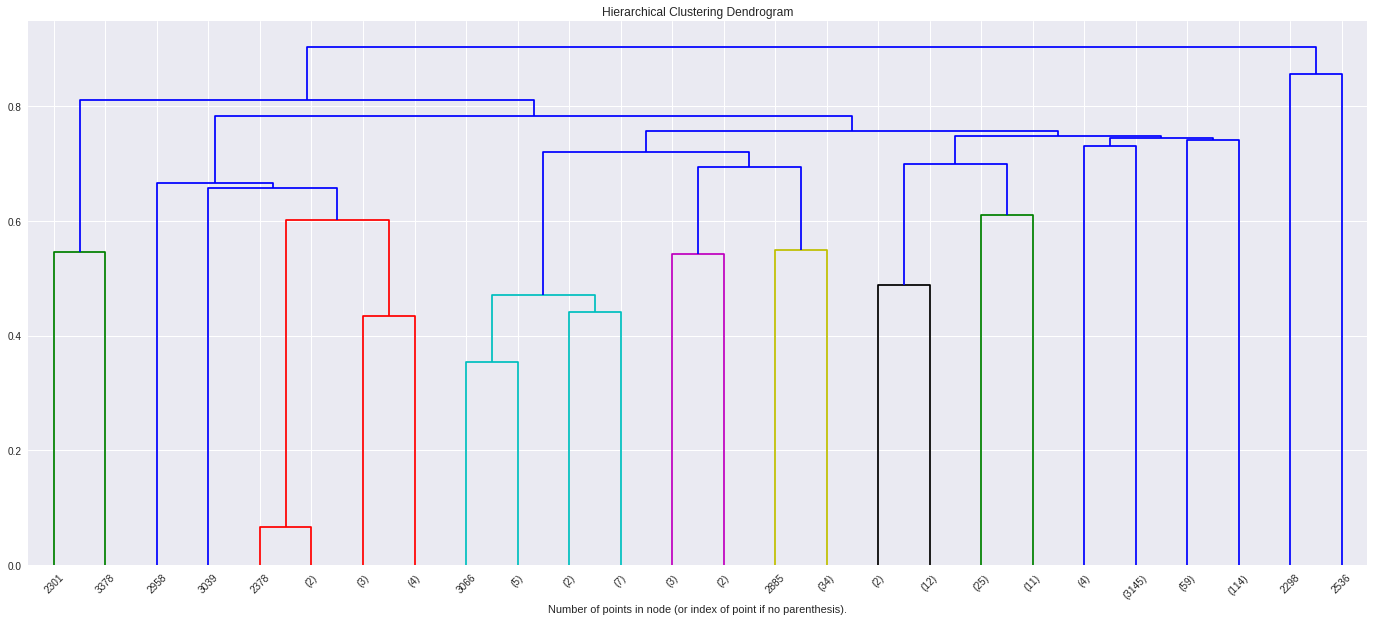

In [82]:
plt.figure(figsize=(24, 10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [57]:
# write to file
f = open('Clusters-Agglomerative.txt', 'w')
for i, cluster in clustered_sentences.items():
    if (len(cluster) > 1): f.write("Cluster %d, #%d Elements :\n" % (i+1, len(cluster)) + str(cluster) + "\n\n\n")
f.close()

In [58]:
percentage = 0.5
train_data_undersampled = list()
for i, cluster in clustered_sentences.items():
  sorted_cluster = sorted(cluster, key=len,  reverse=True)
  # print('original count = %d, downsampled count = %d' %(len(sorted_cluster), math.ceil(percentage * len(sorted_cluster))))
  for j in range(math.ceil(percentage * len(sorted_cluster))):
     item = next(item for item in train_data_dup_free if item["words"] == sorted_cluster[j].strip().split())
     train_data_undersampled.append(item)     

f = open('train_data_undersampled.pkl','wb')
pickle.dump(train_data_undersampled, f)
f.close()

len(train_data_undersampled)

2526

In [59]:
f = open('train_data_undersampled.pkl','rb')
new_dict = pickle.load(f)
f.close()
len(new_dict)

2526

In [60]:
create_iob_file('atis-undersampled-w-intent.iob', train_data_undersampled)

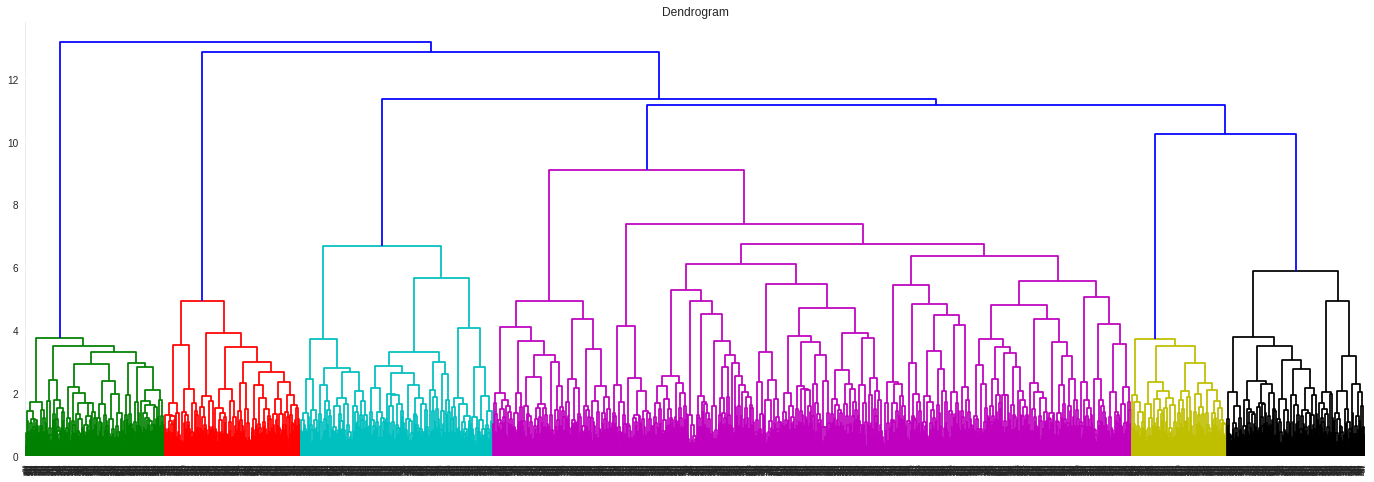

In [61]:
# import sys
# sys.setrecursionlimit(15000)

Z = hierarchy.linkage(corpus_embeddings, 'ward')
plt.figure(figsize=(24, 8))
plt.title('Dendrogram')
dn = hierarchy.dendrogram(Z)
plt.show()

##Final result

In [84]:
import random

train_data_final = list()
train_data_final += [item for item in train_data_dup_free if item['intent'] != 'atis_flight']
train_data_final += train_data_generated
train_data_final += train_data_misspell
train_data_final += train_data_undersampled
random.shuffle(train_data_final)
create_iob_file('atis-train-final-w-intent.iob', train_data_final)

dataset vocab size: 1013
# of dataset rows: 3824
# of dataset unique intents: 16
# of dataset unique IOB tags: 120
-----------------------------------
intents distribution:
atis_distance: 24 (0.63%),
atis_flight: 2526 (66.06%),
atis_restriction: 6 (0.16%),
atis_city: 20 (0.52%),
atis_airfare: 439 (11.48%),
atis_meal: 9 (0.24%),
atis_capacity: 18 (0.47%),
atis_abbreviation: 109 (2.85%),
atis_ground_fare: 18 (0.47%),
atis_flight_no: 15 (0.39%),
atis_aircraft: 86 (2.25%),
atis_ground_service: 259 (6.77%),
atis_flight_time: 59 (1.54%),
atis_airport: 19 (0.50%),
atis_airline: 161 (4.21%),
atis_quantity: 56 (1.46%),



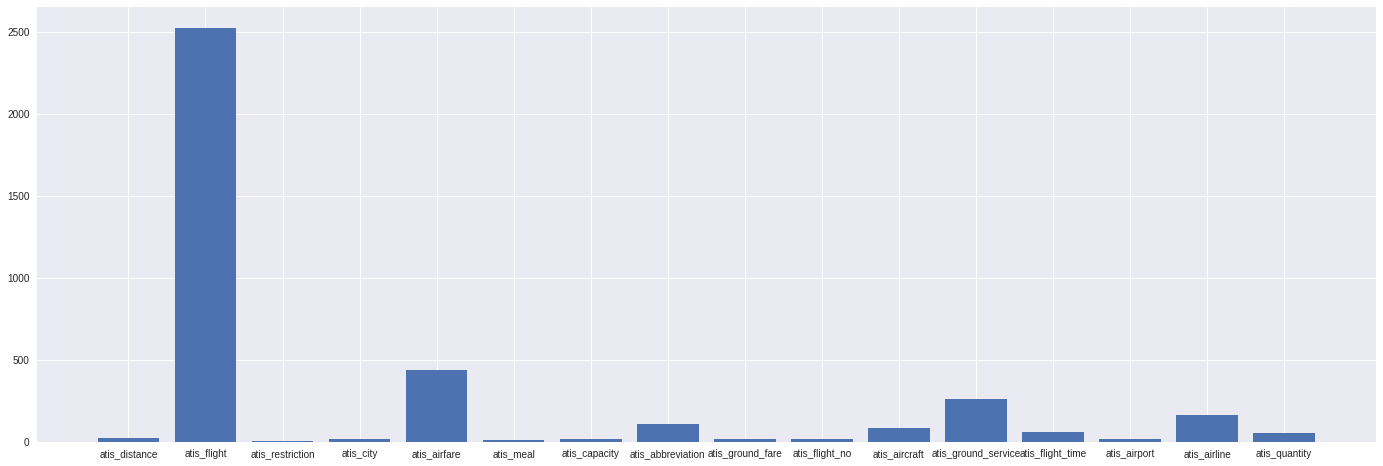


-----------------------------------
tags distribution:
O: 25041 (60.79%),
B-meal: 44 (0.11%),
B-fromloc.city_name: 3210 (7.79%),
B-toloc.airport_code: 21 (0.05%),
B-airline_name: 564 (1.37%),
B-flight_number: 85 (0.21%),
B-cost_relative: 284 (0.69%),
B-toloc.city_name: 3261 (7.92%),
I-fromloc.city_name: 532 (1.29%),
B-depart_time.time: 300 (0.73%),
I-depart_time.time: 240 (0.58%),
B-arrive_time.time: 165 (0.40%),
I-arrive_time.time: 130 (0.32%),
B-depart_date.month_name: 324 (0.79%),
B-depart_date.day_number: 340 (0.83%),
I-toloc.city_name: 872 (2.12%),
B-stoploc.city_name: 175 (0.42%),
B-depart_date.day_name: 656 (1.59%),
B-flight_mod: 238 (0.58%),
B-economy: 34 (0.08%),
B-city_name: 219 (0.53%),
B-state_name: 2 (0.00%),
B-arrive_time.time_relative: 154 (0.37%),
I-city_name: 49 (0.12%),
B-depart_time.time_relative: 260 (0.63%),
I-class_type: 170 (0.41%),
I-airline_name: 349 (0.85%),
B-flight_time: 72 (0.17%),
B-depart_time.period_of_day: 475 (1.15%),
B-airline_code: 110 (0.27%),
B-cl

({'atis_abbreviation': 109,
  'atis_aircraft': 86,
  'atis_airfare': 439,
  'atis_airline': 161,
  'atis_airport': 19,
  'atis_capacity': 18,
  'atis_city': 20,
  'atis_distance': 24,
  'atis_flight': 2526,
  'atis_flight_no': 15,
  'atis_flight_time': 59,
  'atis_ground_fare': 18,
  'atis_ground_service': 259,
  'atis_meal': 9,
  'atis_quantity': 56,
  'atis_restriction': 6},
 {'B-aircraft_code': 29,
  'B-airline_code': 110,
  'B-airline_name': 564,
  'B-airport_code': 20,
  'B-airport_name': 37,
  'B-arrive_date.date_relative': 9,
  'B-arrive_date.day_name': 71,
  'B-arrive_date.day_number': 38,
  'B-arrive_date.month_name': 38,
  'B-arrive_date.today_relative': 2,
  'B-arrive_time.end_time': 14,
  'B-arrive_time.period_mod': 4,
  'B-arrive_time.period_of_day': 56,
  'B-arrive_time.start_time': 15,
  'B-arrive_time.time': 165,
  'B-arrive_time.time_relative': 154,
  'B-city_name': 219,
  'B-class_type': 194,
  'B-connect': 34,
  'B-cost_relative': 284,
  'B-day_name': 5,
  'B-day_num

In [85]:
#importing final result
final_words, final_tags, final_intents, final_vocabs, final_data = dataLoader('atis-train-final-w-intent.iob')
dataStatistics(final_tags, final_intents, final_vocabs)